In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# import metric
from keras.metrics import categorical_crossentropy
# optimization method 
from keras.optimizers import SGD
import os

![](alexnet.png)

VGG-16

![](VGG16-CNN-2.png)

# 1 - Load Data

In [ ]:
#install Kaggle
!pip install Kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hussienhisham","key":"d83de9f8285ff8f7d63703a2976841af"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

100% 218M/218M [00:01<00:00, 189MB/s]
100% 218M/218M [00:01<00:00, 149MB/s]


In [ ]:
!unzip /content/cat-and-dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [ ]:
train_path = os.getcwd() + '/' + '../content/training_set/training_set/' 
test_path = os.getcwd() + '/' + '../content/test_set/test_set/' 

In [ ]:
print('The training set consists of ', len(os.listdir(train_path + 'dogs/')), ' dog images and ', len(os.listdir(train_path + 'cats/')), ' cat images.' )
print('The test set consists of ', len(os.listdir(test_path + 'dogs/')), ' dog images and ', len(os.listdir(test_path + 'cats/')), ' cat images.' )

The training set consists of  4006  dog images and  4001  cat images.
The test set consists of  1013  dog images and  1012  cat images.


In [ ]:
import cv2
from PIL import Image
import numpy as np

In [ ]:
cates = ['dogs', 'cats']
def load_images_and_labels(data_path, cates): 
  X = []
  y = []
  i = 0
  for index, cate in enumerate(cates): 
    for img_name in os.listdir(data_path + cate + '/'):
      i = i +1
      print(i)
      img = cv2.imread(data_path + cate + '/' + img_name)
      if img is not None: 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = Image.fromarray(img, 'RGB')
        # resize image to 227x227 which is the required input size of the Alexnet model
        img_rs = img_array.resize((227,227))
        # convert the image to array
        img_rs = np.array(img_rs)
      
        X.append(img_rs)
        y.append(index)
  return X, y

Load the training data 

In [ ]:
X_train, y_train = load_images_and_labels(train_path, cates)

Streaming output truncated to the last 5000 lines.
3008
3009
3010
3011
3012
3013
3014
3015
3016
3017
3018
3019
3020
3021
3022
3023
3024
3025
3026
3027
3028
3029
3030
3031
3032
3033
3034
3035
3036
3037
3038
3039
3040
3041
3042
3043
3044
3045
3046
3047
3048
3049
3050
3051
3052
3053
3054
3055
3056
3057
3058
3059
3060
3061
3062
3063
3064
3065
3066
3067
3068
3069
3070
3071
3072
3073
3074
3075
3076
3077
3078
3079
3080
3081
3082
3083
3084
3085
3086
3087
3088
3089
3090
3091
3092
3093
3094
3095
3096
3097
3098
3099
3100
3101
3102
3103
3104
3105
3106
3107
3108
3109
3110
3111
3112
3113
3114
3115
3116
3117
3118
3119
3120
3121
3122
3123
3124
3125
3126
3127
3128
3129
3130
3131
3132
3133
3134
3135
3136
3137
3138
3139
3140
3141
3142
3143
3144
3145
3146
3147
3148
3149
3150
3151
3152
3153
3154
3155
3156
3157
3158
3159
3160
3161
3162
3163
3164
3165
3166
3167
3168
3169
3170
3171
3172
3173
3174
3175
3176
3177
3178
3179
3180
3181
3182
3183
3184
3185
3186
3187
3188
3189
3190
3191
3192
3193
3194
3195
3196
3197

Load the test set

In [ ]:
X_test, y_test = load_images_and_labels(test_path, cates)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
print('Training size: ', len(X_train), 'Testing size: ', len(X_test))

Training size:  8005 Testing size:  2023


Save X_train, y_train, X_test, y_test

In [ ]:
data_dict = {'X_train' : X_train, 
             'y_train': y_train, 
             'X_test': X_test, 
             'y_test': y_test}
np.save('data_dict.npy', data_dict)

Load X_train, y_train, X_test, y_test

In [ ]:
data_dict_ = np.load('data_dict.npy', allow_pickle = 'True').item()
X_train = data_dict_['X_train']
y_train = data_dict_['y_train']
X_test = data_dict_['X_test']
y_test = data_dict_['y_test']

Display randomly some images of the training set: 

In [ ]:
import matplotlib.pyplot as plt
import random

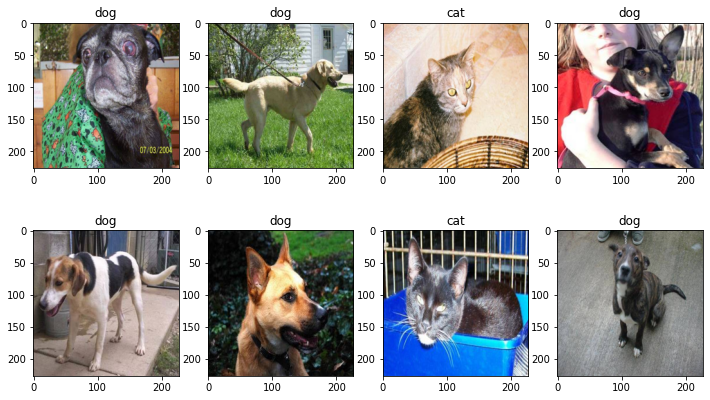

In [ ]:
plt.figure(figsize = (12,7))
cate = ['dog', 'cat']
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240 + 1 + i)
  plt.imshow(X_train[ind])
  plt.title(cate[y_train[ind]])

### 2. Data preprocessing

This task consists of the following steps: 
- Convert integer values into floats
- Normalization
- One-hot encoding 

In [ ]:
from keras.utils import to_categorical

In [ ]:
def preprocess_data(X, y):
  # convert X from list to array
  X = np.array(X)
  
  # convert integer values of X into floats
  X = X.astype(np.float32)

  # normalization 
  X = X/255.0
  
  # one-hot encoding the labels 
  y = to_categorical(np.array(y))
    
  return X, y

In [ ]:
(X_train, y_train) = preprocess_data(X_train, y_train)

In [ ]:
(X_test, y_test) = preprocess_data(X_test, y_test)

Visualize some images of the training set after preprocessing: 

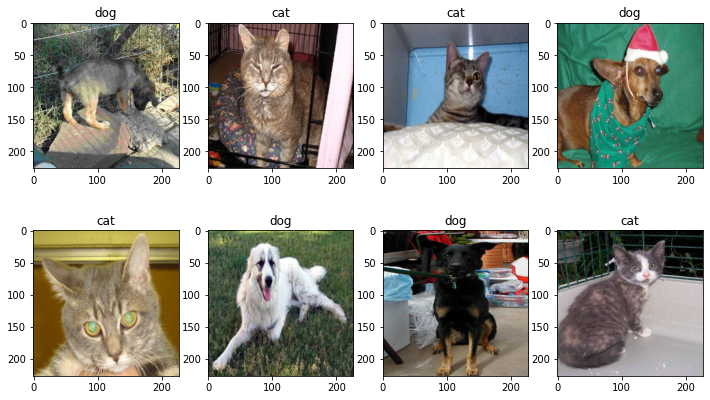

In [ ]:
plt.figure(figsize = (12,7))
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240 + 1 + i)
  plt.imshow(X_train[ind])
  plt.title(cate[np.argmax(y_train[ind])])

### 3. Define the Alexnet model
Remark that the output number in this case is two, which is corresponding to the number of classes 

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# metric
from keras.metrics import binary_crossentropy
# optimization method (Stochastic Gradient Descent (SGD))
from keras.optimizers import SGD

In [ ]:
def Alexnet():
  # Initialize the model
  model = Sequential()

  # layer 1: convolutional layer + max-pooling layer
  model.add(Conv2D(filters = 96, kernel_size = (11,11), strides= 4, padding = 'valid', activation='relu', input_shape = (227,227,3)))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # layer 2: convolutional layer + max-pooling layer 
  model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # layers 3-5: three convolutional layers + 1 max-pooling layer
  model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # layers 6 - 8: two fully connected hidden layers and one fully connected output layer
  model.add(Flatten())
  model.add(Dense(4096, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(2, activation = 'softmax'))

  # compile the model with a loss funciton, a metric and and optimizqation method
  opt = SGD(lr = 0.1)
  model.compile(loss = binary_crossentropy,
                optimizer = opt,
                metrics = ['accuracy'])

  return model

In [ ]:
Alexnet_model = Alexnet()
Alexnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 256)      

### 4. Train the model
In this section, we apply data augementation techniques to reduce overfitfing, including rotation the image of 5 degrees, width shift range is 0.1, height shift range is 0.1 and horieontal flip. These techniques can be affected thanks to the ***ImageDataGenerator*** function from the ***keras.preprocessin.image*** module. 

Define the training function: 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

In [ ]:
def train_model(model, X_train, y_train, X_test, y_test, epochs, batch_size):
  # Data generator
  datagen = ImageDataGenerator(rotation_range = 5, width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)
  # iteration on the training set
  it_train = datagen.flow(X_train, y_train, batch_size = batch_size)
  # path to save checkpoint 
  path_cp = os.getcwd() + '/' + 'weights_.hdf5'
  checkpoint_ = ModelCheckpoint(path_cp, monitor = 'loss', save_best_only = True, mode = 'auto')
  steps = X_train.shape[0]//batch_size
  # Fitting the model
  history = model.fit_generator(it_train, epochs = epochs, steps_per_epoch = steps, 
                                validation_data = (X_test, y_test), verbose = 1, 
                                callbacks = checkpoint_)
  # Evaluating the model
  _, acc = model.evaluate(X_test, y_test, verbose = 1)
  print('%.3f' % (acc * 100.0))
  
  return history, acc

In [ ]:
train_history, acc = train_model(Alexnet_model, X_train, y_train, X_test, y_test, epochs = 100, batch_size = 128)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
62/62 [==============================] - 117s 2s/step - loss: 0.6932 - accuracy: 0.5027 - val_loss: 0.6914 - val_accuracy: 0.5230
Epoch 2/100
62/62 [==============================] - 116s 2s/step - loss: 0.6911 - accuracy: 0.5344 - val_loss: 0.6877 - val_accuracy: 0.5245
Epoch 3/100
62/62 [==============================] - 116s 2s/step - loss: 0.6874 - accuracy: 0.5460 - val_loss: 0.6846 - val_accuracy: 0.5699
Epoch 4/100
62/62 [==============================] - 116s 2s/step - loss: 0.6902 - accuracy: 0.5269 - val_loss: 0.6862 - val_accuracy: 0.5393
Epoch 5/100
62/62 [==============================] - 116s 2s/step - loss: 0.6860 - accuracy: 0.5563 - val_loss: 0.7487 - val_accuracy: 0.5002
Epoch 6/100
62/62 [==============================] - 116s 2s/step - loss: 0.6918 - accuracy: 0.5459 - val_loss: 0.6678 - val_accuracy: 0.6144
Epoch 7/100
62/62 [==============================] - 116s 2s/step - loss: 0.6992 - accuracy: 0.5144 - val_loss: 0.6793 - val_accuracy: 0.5976
Epoch 

Save the training history and the accuracy

In [ ]:
import pandas as pd

In [ ]:
# convert the history.history dict to a pandas DataFrame:     
train_hist_df = pd.DataFrame(train_history.history) 

train_dict = {'train_hist': train_hist_df, 
              'acc': acc}
np.save('train_dict.npy', train_dict)         

Save the trained Alexnet_model

In [ ]:
Alexnet_model.save('Alexnet_model.h5')

In [ ]:
def plot_accuracy(history):
  plt.figure(figsize = (10,6))
  plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
  plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
  plt.legend()
  plt.title('Accuracy')
  plt.show()

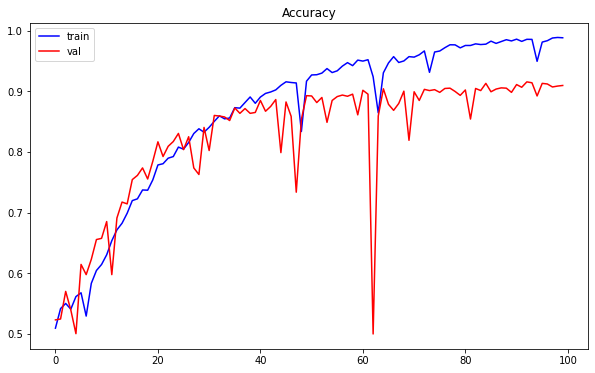

In [ ]:
plot_accuracy(train_history)

We see that the accuracies on both sets tend to increase (up to 98.85% for the training set and 90.95 % for the testing set) as the number of epochs increases. These values can still be improved with a higher number of epochs.

### 5. Prediction

In [ ]:
y_test_pred = []
for i in np.arange(len(X_test)):
  img = X_test[i]
  img = img.reshape(1, 227, 227, 3)
  y_p = Alexnet_model.predict(img)
  y_test_pred.append(y_p)

y_test_pred = np.asarray(y_test_pred)

Determine the confusion matrix 

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

Reverse the true and the predicted labels into the original binary labels (0 and 1) to compute the confusion matrix

In [ ]:
y_test_labels = [np.argmax(vect) for vect in y_test]
y_test_pred_labels = [np.argmax(vect) for vect in y_test_pred]

Text(69.0, 0.5, 'True classes')

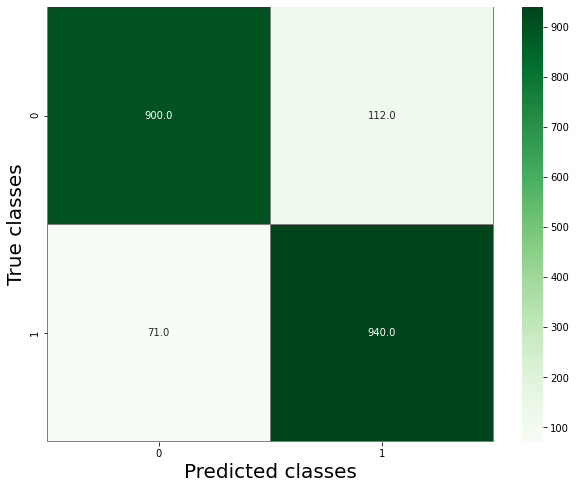

In [ ]:
conf_mat = confusion_matrix(y_test_labels, y_test_pred_labels)

plt.figure(figsize = (10,8))
sns.heatmap(conf_mat, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)

This matrix describes the number of images that are correctly or incorrectly classified in each class. Based on this matrix, we see that:
- 900 dog images and 940 cat images are classified correctly in their classes.
- 112 dog images are classified into the “cat” class.
- 71 cat images are classified into the “dog” class.

![](recall-formulas.png)

Precision = 0.9268795057
Recall = 0.8893280632
F1-Score = 0.9077155824

Visualize some images and their predicted classes:

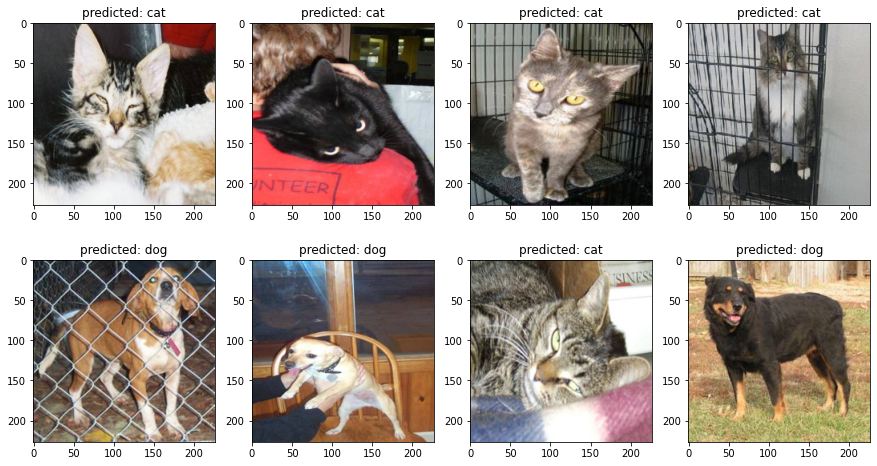

In [ ]:
plt.figure(figsize = (15,8))
for i in np.arange(8):
  # take randomly in indice
  ind = random.randint(0, len(X_test))
  img = X_test[ind]
  # resize the image 
  img_rs = img.reshape(1,227,227,3)
  # predict the label of img
  y_pred = Alexnet_model.predict(img_rs)
  # determine the corresponding category
  predicted_cate = cate[np.argmax(y_pred)]
  plt.subplot(240+1+i)
  plt.imshow(img)
  plt.title('predicted: ' + str(predicted_cate))

We have discovered the architecture of the Alexnet model and its implementation on the Keras platform. This model is applied for classifying dog and cat images with a performance of 90.954 % in the testing set is achieved. However, this performance can still be improved by getting more training data, trying a higher number of epochs, changing the hyperparameters, and so on. Besides, there are also some other techniques to improve the model in each particular case

#2 VGG 16

In [ ]:
def VGG16():
    model = Sequential()
    model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
    model.add(Flatten(name='flatten'))
    model.add(Dense(256, activation='relu', name='fc1'))
    model.add(Dense(128, activation='relu', name='fc2'))
    model.add(Dense(1, activation='sigmoid', name='output'))
    return model

In [ ]:
model=VGG16()


In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  